In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:

df = pd.read_csv('diabetic_data.csv',na_values=["?"])
#df = pd.read_csv('diabetic_data.csv')

df

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Preprocessing of data(diabetes_data):

In [3]:
# We have been given that 97% of the values in the weight columns are missing, So I am dropping 'weight feature'.
df.drop('weight',axis = 1, inplace = True)

#The 'payer_code' and 'medical speciality' feature has 52% and 53% missing values respectively. If the 
#missing values are filled with some default values or filled according to average, it may give us false results.
# Hence I am also dropping these 2 features('payer_code','medical speciality')
df.drop('payer_code',axis = 1, inplace = True)
df.drop('medical_specialty',axis = 1, inplace = True)

#The 'race' feature has 2% missing values. I am dropping all the rows with the missing race.
#df['race'].unique()
df = df[df['race'].notna()]

#Doing the same to 'Diagnosis 3' feature, where there are 1% rows with missing values(Dropping them).
df = df[df['diag_3'].notna()]

df


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df['readmitted'].value_counts()

NO     52381
>30    34681
<30    11082
Name: readmitted, dtype: int64

In [5]:
## We need a binary clasification, so making '<30' as one class and combining '>30' and 'NO' as one class.
df['readmitted'] = df['readmitted'].replace(['>30'],'NO')

## Replacing '<30' class to 'YES'
df['readmitted'] = df['readmitted'].replace(['<30'],'YES')

le_readmit = preprocessing.LabelEncoder()
le_readmit.fit(df['readmitted'])
df['readmitted'] = le_readmit.transform(df['readmitted'])

In [6]:
df['readmitted'].value_counts()

0    87062
1    11082
Name: readmitted, dtype: int64

The objective of the model we are going to build a model which can predict readmission (<30 days = YES). There are only around 11% of the total entries in this dataset. Hence overall accuracy is not a perfect measure of how good this model is. The model needs to classify the rarer class('YES') correctly.
### Due to class imbalance, I will use a PR(precision-recall) curve to determine how good the model is.

In [7]:
df['race'].value_counts()

Caucasian          75151
AfricanAmerican    18896
Hispanic            1988
Other               1484
Asian                625
Name: race, dtype: int64

#### Plotting a few graphs to understand the data better:

Text(0.5, 1.0, 'Frequency of time in hospital:')

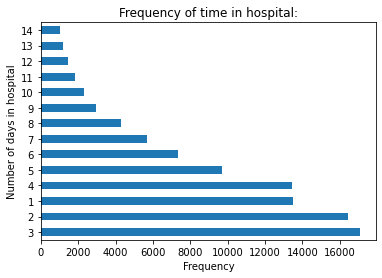

In [8]:
df['time_in_hospital'].value_counts()

df['time_in_hospital'].value_counts().plot(kind='barh')
plt.ylabel("Number of days in hospital")
plt.xlabel("Frequency")
plt.title("Frequency of time in hospital:")

We can see that most of the patients stayed for less than 6 days in the hospital. It means the data is not concentrated with patients with only severe conditions who need to be admitted for more days.

In [9]:
df['gender'].value_counts()  
#We can see that we have one row with unknown gender , which we are going to drop

Female             52876
Male               45267
Unknown/Invalid        1
Name: gender, dtype: int64

In [10]:
df = df[df.gender !='Unknown/Invalid']   #dropping rows with invalid gender

#### Applying one hot encoding on columns:

In [11]:
#Transforming the 'race' column:
le_race = preprocessing.LabelEncoder()
le_race.fit(df['race'])
df['race'] = le_race.transform(df['race'])

#Transforming the 'gender' column:
le_gender = preprocessing.LabelEncoder()
le_gender.fit(df['gender'])
df['gender'] = le_gender.transform(df['gender'])

#Transforming the 'age' column:
le_age = preprocessing.LabelEncoder()
le_age.fit(df['age'])
df['age'] = le_age.transform(df['age'])



/var/folders/df/1zvdd49s3nn9d_mlk18syvm40000gn/T/ipykernel_27868/1331760414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'] = le_race.transform(df['race'])
/var/folders/df/1zvdd49s3nn9d_mlk18syvm40000gn/T/ipykernel_27868/1331760414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le_gender.transform(df['gender'])
/var/folders/df/1zvdd49s3nn9d_mlk18syvm40000gn/T/ipykernel_27868/1331760414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [12]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,2,0,1,1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,0,0,2,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,2,1,3,1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,2,1,4,1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,2,1,5,2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,0,0,8,1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,2,1,7,1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,2,0,8,2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [13]:
## For diag_1, diag_2 and diag_3. I am dropping rows with '?' and assigning numbers to each range

In [14]:
## modifying diag_1,diag_2,diag_3 columns for the model.

# First dropping the rows with null values in all the three columns
df = df.dropna(subset=['diag_1'])
df = df.dropna(subset=['diag_2'])
df = df.dropna(subset=['diag_3'])


## Putting the diagnosis which start with E,V,M in 3 seperate categories(combining all the 
## diagnosis starting with E,V,M in one category)
df.loc[df['diag_1'].str.contains('E'),'diag_1']='18000'
df.loc[df['diag_1'].str.contains('V'),'diag_1']='19000'
df.loc[df['diag_1'].str.contains('M'),'diag_1']='20000'

df.loc[df['diag_2'].str.contains('E'),'diag_2']='18000'
df.loc[df['diag_2'].str.contains('V'),'diag_2']='19000'
df.loc[df['diag_2'].str.contains('M'),'diag_2']='20000'

df.loc[df['diag_3'].str.contains('E'),'diag_3']='18000'
df.loc[df['diag_3'].str.contains('V'),'diag_3']='19000'
df.loc[df['diag_3'].str.contains('M'),'diag_3']='20000'

## Converting the diagnosis columns to integer for ease in calculation.
df['diag_1'] = df['diag_1'].astype(str).astype(float)
df['diag_2'] = df['diag_2'].astype(str).astype(float)
df['diag_3'] = df['diag_3'].astype(str).astype(float)


## The wikipedia link provided was used to make 20 different ranges 
df.loc[df['diag_1'] < 140, 'diag_1'] = 1000     ## 001-139 = 1000
df.loc[df['diag_1'] < 240, 'diag_1'] = 2000     ## 140-239 = 2000
df.loc[df['diag_1'] < 280, 'diag_1'] = 3000     ## 240-279 = 3000 and so on 
df.loc[df['diag_1'] < 290, 'diag_1'] = 4000
df.loc[df['diag_1'] < 320, 'diag_1'] = 5000
df.loc[df['diag_1'] < 390, 'diag_1'] = 6000
df.loc[df['diag_1'] < 460, 'diag_1'] = 7000
df.loc[df['diag_1'] < 520, 'diag_1'] = 8000
df.loc[df['diag_1'] < 580, 'diag_1'] = 9000
df.loc[df['diag_1'] < 630, 'diag_1'] = 10000
df.loc[df['diag_1'] < 680, 'diag_1'] = 11000
df.loc[df['diag_1'] < 710, 'diag_1'] = 12000
df.loc[df['diag_1'] < 740, 'diag_1'] = 13000
df.loc[df['diag_1'] < 760, 'diag_1'] = 14000
df.loc[df['diag_1'] < 780, 'diag_1'] = 15000
df.loc[df['diag_1'] < 800, 'diag_1'] = 16000
df.loc[df['diag_1'] < 1000, 'diag_1'] = 17000

## Doing the same for column 'diag_2'
df.loc[df['diag_2'] < 140, 'diag_2'] = 1000
df.loc[df['diag_2'] < 240, 'diag_2'] = 2000
df.loc[df['diag_2'] < 280, 'diag_2'] = 3000
df.loc[df['diag_2'] < 290, 'diag_2'] = 4000
df.loc[df['diag_2'] < 320, 'diag_2'] = 5000
df.loc[df['diag_2'] < 390, 'diag_2'] = 6000
df.loc[df['diag_2'] < 460, 'diag_2'] = 7000
df.loc[df['diag_2'] < 520, 'diag_2'] = 8000
df.loc[df['diag_2'] < 580, 'diag_2'] = 9000
df.loc[df['diag_2'] < 630, 'diag_2'] = 10000
df.loc[df['diag_2'] < 680, 'diag_2'] = 11000
df.loc[df['diag_2'] < 710, 'diag_2'] = 12000
df.loc[df['diag_2'] < 740, 'diag_2'] = 13000
df.loc[df['diag_2'] < 760, 'diag_2'] = 14000
df.loc[df['diag_2'] < 780, 'diag_2'] = 15000
df.loc[df['diag_2'] < 800, 'diag_2'] = 16000
df.loc[df['diag_2'] < 1000, 'diag_2'] = 17000

## Doing the same for column 'diag_3'
df.loc[df['diag_3'] < 140, 'diag_3'] = 1000
df.loc[df['diag_3'] < 240, 'diag_3'] = 2000
df.loc[df['diag_3'] < 280, 'diag_3'] = 3000
df.loc[df['diag_3'] < 290, 'diag_3'] = 4000
df.loc[df['diag_3'] < 320, 'diag_3'] = 5000
df.loc[df['diag_3'] < 390, 'diag_3'] = 6000
df.loc[df['diag_3'] < 460, 'diag_3'] = 7000
df.loc[df['diag_3'] < 520, 'diag_3'] = 8000
df.loc[df['diag_3'] < 580, 'diag_3'] = 9000
df.loc[df['diag_3'] < 630, 'diag_3'] = 10000
df.loc[df['diag_3'] < 680, 'diag_3'] = 11000
df.loc[df['diag_3'] < 710, 'diag_3'] = 12000
df.loc[df['diag_3'] < 740, 'diag_3'] = 13000
df.loc[df['diag_3'] < 760, 'diag_3'] = 14000
df.loc[df['diag_3'] < 780, 'diag_3'] = 15000
df.loc[df['diag_3'] < 800, 'diag_3'] = 16000
df.loc[df['diag_3'] < 1000, 'diag_3'] = 17000

#df.loc[(df['diag_1'] > 139)] and df.loc[(df['diag_1'] < 240)] = 2





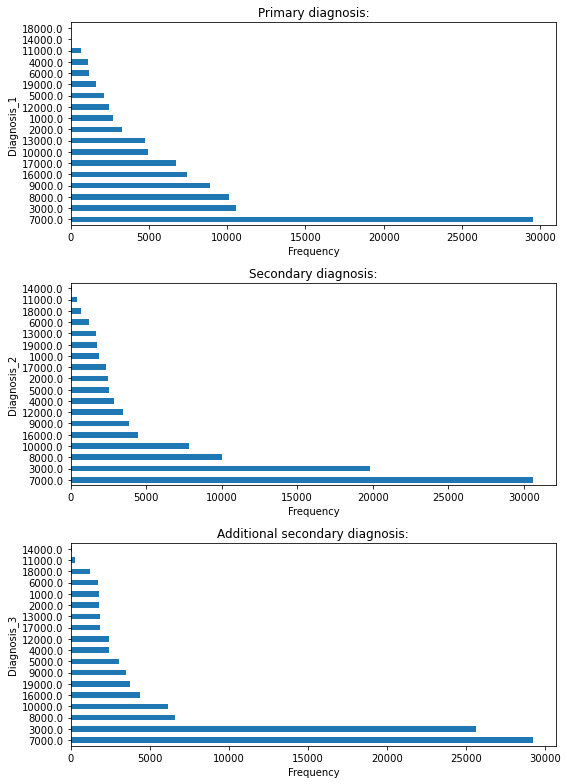

In [15]:
df['diag_1'].value_counts()

#Adjusting the figure size
plt.subplots(figsize=(8, 11))

#plotting the bar graph of 'diag_1' column.
plt.subplot(3,1,1)
df['diag_1'].value_counts().plot(kind='barh')
plt.ylabel("Diagnosis_1")
plt.xlabel("Frequency")
plt.title("Primary diagnosis:")

#plotting the bar graph of 'diag_2' column.
plt.subplot(3,1,2)
df['diag_2'].value_counts().plot(kind='barh')
plt.ylabel("Diagnosis_2")
plt.xlabel("Frequency")
plt.title("Secondary diagnosis:")

#plotting the bar graph of 'diag_3' column.
plt.subplot(3,1,3)
df['diag_3'].value_counts().plot(kind='barh')
plt.ylabel("Diagnosis_3")
plt.xlabel("Frequency")
plt.title("Additional secondary diagnosis:")

plt.tight_layout()

In all 3 plots we can see that the 7000(Diseases of the Circulatory System),
3000(Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders),
and 8000(Diseases of the Respiratory System) are the 3 largest diagnosis of the patients.

In [16]:
#Transforming all the remaining columns to make them ready for model training.

medications = ['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
               'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
               'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
               'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
               'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed']


#Using for loop to transform rest of the columns 
medi_transform = preprocessing.LabelEncoder()
for i in medications:
    medi_transform.fit(df[i])
    df[i] = medi_transform.transform(df[i])
    
    

In [17]:
df['readmitted'].value_counts() 

0    86986
1    11066
Name: readmitted, dtype: int64

In [18]:
print("The number of rows in the dataset is: "+str(len(df)))

The number of rows in the dataset is: 98052


In [19]:
dup_df = df.drop_duplicates()
print("The number of rows in the dataset after dropping duplicate rows is: "+str(len(dup_df)))

The number of rows in the dataset after dropping duplicate rows is: 98052


#### We can say that there are no duplicate records left in the dataset.

#### We were told to consider the revisiting patients as new entries

#### I am not going to use 'encounter_id' and 'patient_nbr' columns in my model. Hence dropping them

In [20]:
df = df.drop(['encounter_id','patient_nbr'],axis=1)

In [21]:
matrix = df.corr()
matrix

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.067074,0.131924,0.102816,-0.007983,0.021360,-0.020477,-0.022044,0.027708,0.028487,...,NaN,-0.019249,0.009676,0.004562,0.001265,NaN,0.001265,-0.013602,0.002762,-0.003008
gender,0.067074,1.000000,-0.052631,0.014775,-0.020865,-0.003982,-0.028961,-0.002358,0.061339,-0.022085,...,NaN,0.002786,0.003795,0.007116,-0.002954,NaN,-0.002954,-0.015019,0.015742,-0.002544
age,0.131924,-0.052631,1.000000,-0.006143,0.114274,0.046852,0.096687,0.016611,-0.042699,0.019955,...,NaN,-0.019074,-0.002220,0.001910,-0.000258,NaN,-0.000258,0.041439,-0.020812,0.013550
admission_type_id,0.102816,0.014775,-0.006143,1.000000,0.079882,0.109274,-0.012202,-0.141201,0.129457,0.080268,...,NaN,-0.006015,-0.002467,-0.004481,-0.002259,NaN,0.002145,-0.007416,0.001063,-0.011170
discharge_disposition_id,-0.007983,-0.020865,0.114274,0.079882,1.000000,0.016526,0.162903,0.022601,0.013879,0.106696,...,NaN,-0.021452,-0.004582,0.000368,-0.001656,NaN,-0.000453,0.013047,-0.028127,0.050422
admission_source_id,0.021360,-0.003982,0.046852,0.109274,0.016526,1.000000,-0.007989,0.048039,-0.134654,-0.055733,...,NaN,-0.011113,-0.022898,-0.000456,0.000959,NaN,-0.003747,-0.001903,0.001215,0.005380
time_in_hospital,-0.020477,-0.028961,0.096687,-0.012202,0.162903,-0.007989,1.000000,0.318632,0.191164,0.464212,...,NaN,0.047196,-0.001647,-0.000736,-0.002584,NaN,0.001684,-0.108389,0.062335,0.043398
num_lab_procedures,-0.022044,-0.002358,0.016611,-0.141201,0.022601,0.048039,0.318632,1.000000,0.058710,0.267863,...,NaN,0.034391,-0.009571,-0.007681,-0.000834,NaN,-0.003264,-0.062852,0.031936,0.019902
num_procedures,0.027708,0.061339,-0.042699,0.129457,0.013879,-0.134654,0.191164,0.058710,1.000000,0.382952,...,NaN,0.011880,-0.001476,-0.005475,-0.002525,NaN,-0.000656,-0.004592,-0.004686,-0.012470
num_medications,0.028487,-0.022085,0.019955,0.080268,0.106696,-0.055733,0.464212,0.267863,0.382952,1.000000,...,NaN,0.080230,0.008669,0.003435,-0.003592,NaN,0.001528,-0.246513,0.189318,0.037773


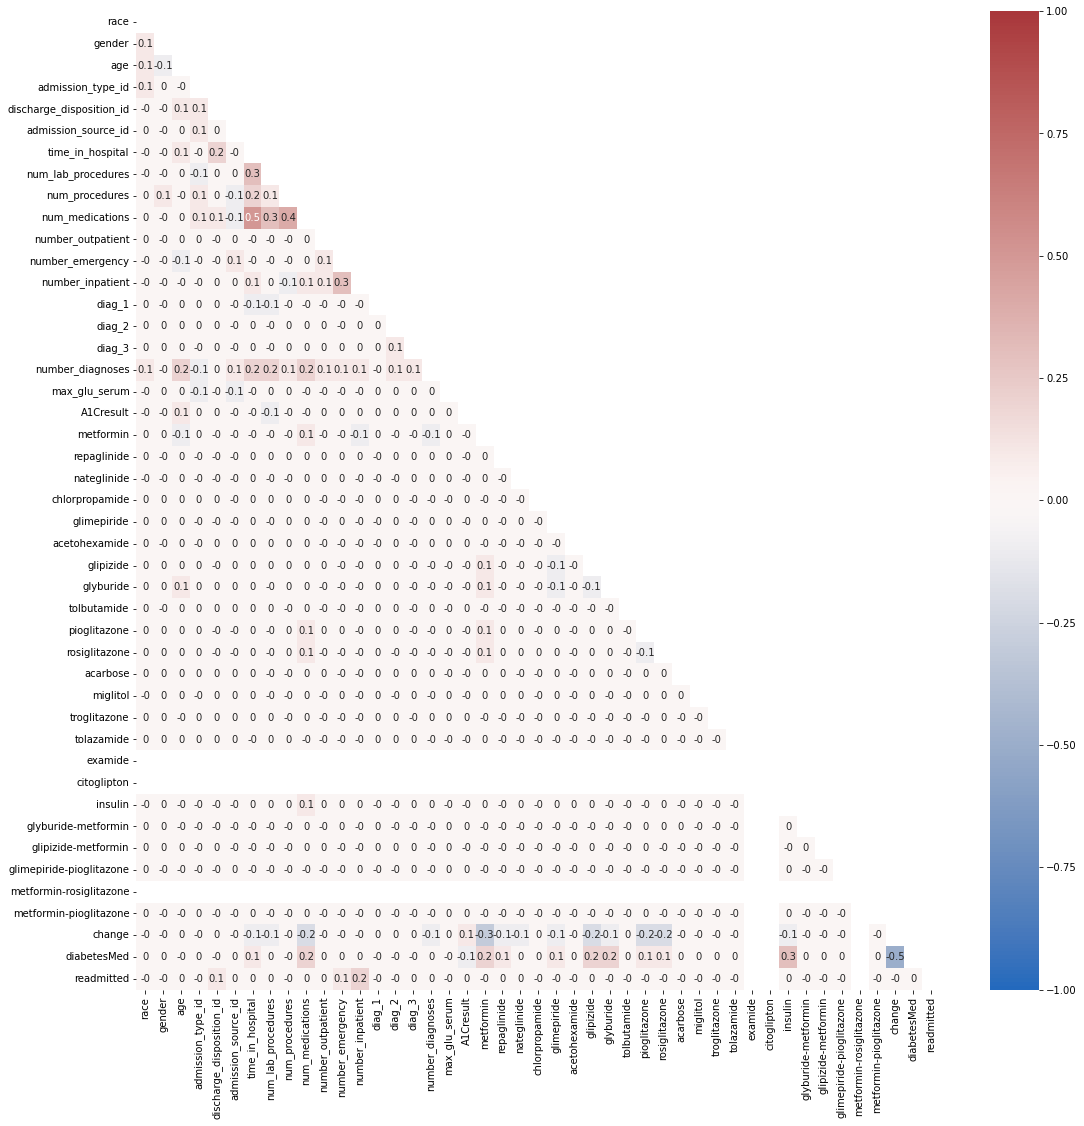

In [22]:
#I am rounding the values to 1 decimal for showing the graph as when i round it to two, the values overlap.
# This graph is just for looking at it color-wise(If the color is darker, the correlation is a bit better 
# than rest of the columns.)
matrix = df.corr().round(1)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,annot=True,vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()

In [23]:
# The following are the highest coorelations in between the features:

## Time in hospital and number of lab procedures coorelation:    0.318561
## Number of procedures and number of medications coorelation:   0.382764
## Number of medications and time in hospital coorelation:       0.464227

# This means most of the columns are not coorelated to eaach other or with the class variable column

### Applying all the same transformations which we applied to the whole dataset to train and test dataset

In [24]:
df_train = pd.read_csv('diabetic_data_train.csv',na_values=["?"])
df_test = pd.read_csv('diabetic_data_test.csv',na_values=["?"])

In [25]:
df_train.drop('weight',axis = 1, inplace = True)
df_test.drop('weight',axis = 1, inplace = True)

df_train.drop('payer_code',axis = 1, inplace = True)
df_train.drop('medical_specialty',axis = 1, inplace = True)
df_test.drop('payer_code',axis = 1, inplace = True)
df_test.drop('medical_specialty',axis = 1, inplace = True)

df_train = df_train[df_train['race'].notna()]
df_test = df_test[df_test['race'].notna()]

df_train = df_train[df_train['diag_3'].notna()]
df_test = df_test[df_test['diag_3'].notna()]

df_train['readmitted'] = df_train['readmitted'].replace(['>30'],'NO')
df_test['readmitted'] = df_test['readmitted'].replace(['>30'],'NO')

df_train['readmitted'] = df_train['readmitted'].replace(['<30'],'YES')
df_test['readmitted'] = df_test['readmitted'].replace(['<30'],'YES')

df_train = df_train[df_train.gender !='Unknown/Invalid']
df_test = df_test[df_test.gender !='Unknown/Invalid']

le_race.fit(df_train['race'])
df_train['race'] = le_race.transform(df_train['race'])
le_race.fit(df_test['race'])
df_test['race'] = le_race.transform(df_test['race'])

le_gender.fit(df_train['gender'])
df_train['gender'] = le_gender.transform(df_train['gender'])
le_gender.fit(df_test['gender'])
df_test['gender'] = le_gender.transform(df_test['gender'])

le_age.fit(df_train['age'])
df_train['age'] = le_age.transform(df_train['age'])
le_age.fit(df_test['age'])
df_test['age'] = le_age.transform(df_test['age'])

df_train = df_train.dropna(subset=['diag_1'])
df_train = df_train.dropna(subset=['diag_2'])
df_train = df_train.dropna(subset=['diag_3'])

df_test = df_test.dropna(subset=['diag_1'])
df_test = df_test.dropna(subset=['diag_2'])
df_test = df_test.dropna(subset=['diag_3'])

df_train.loc[df_train['diag_1'].str.contains('E'),'diag_1']='18000'
df_train.loc[df_train['diag_1'].str.contains('V'),'diag_1']='19000'
df_train.loc[df_train['diag_1'].str.contains('M'),'diag_1']='20000'

df_train.loc[df_train['diag_2'].str.contains('E'),'diag_2']='18000'
df_train.loc[df_train['diag_2'].str.contains('V'),'diag_2']='19000'
df_train.loc[df_train['diag_2'].str.contains('M'),'diag_2']='20000'

df_train.loc[df_train['diag_3'].str.contains('E'),'diag_3']='18000'
df_train.loc[df_train['diag_3'].str.contains('V'),'diag_3']='19000'
df_train.loc[df_train['diag_3'].str.contains('M'),'diag_3']='20000'

df_test.loc[df_test['diag_1'].str.contains('E'),'diag_1']='18000'
df_test.loc[df_test['diag_1'].str.contains('V'),'diag_1']='19000'
df_test.loc[df_test['diag_1'].str.contains('M'),'diag_1']='20000'

df_test.loc[df_test['diag_2'].str.contains('E'),'diag_2']='18000'
df_test.loc[df_test['diag_2'].str.contains('V'),'diag_2']='19000'
df_test.loc[df_test['diag_2'].str.contains('M'),'diag_2']='20000'

df_test.loc[df_test['diag_3'].str.contains('E'),'diag_3']='18000'
df_test.loc[df_test['diag_3'].str.contains('V'),'diag_3']='19000'
df_test.loc[df_test['diag_3'].str.contains('M'),'diag_3']='20000'

df_train['diag_1'] = df_train['diag_1'].astype(str).astype(float)
df_train['diag_2'] = df_train['diag_2'].astype(str).astype(float)
df_train['diag_3'] = df_train['diag_3'].astype(str).astype(float)

df_test['diag_1'] = df_test['diag_1'].astype(str).astype(float)
df_test['diag_2'] = df_test['diag_2'].astype(str).astype(float)
df_test['diag_3'] = df_test['diag_3'].astype(str).astype(float)

df_train.loc[df_train['diag_1'] < 140, 'diag_1'] = 1000  
df_train.loc[df_train['diag_1'] < 240, 'diag_1'] = 2000     
df_train.loc[df_train['diag_1'] < 280, 'diag_1'] = 3000     
df_train.loc[df_train['diag_1'] < 290, 'diag_1'] = 4000
df_train.loc[df_train['diag_1'] < 320, 'diag_1'] = 5000
df_train.loc[df_train['diag_1'] < 390, 'diag_1'] = 6000
df_train.loc[df_train['diag_1'] < 460, 'diag_1'] = 7000
df_train.loc[df_train['diag_1'] < 520, 'diag_1'] = 8000
df_train.loc[df_train['diag_1'] < 580, 'diag_1'] = 9000
df_train.loc[df_train['diag_1'] < 630, 'diag_1'] = 10000
df_train.loc[df_train['diag_1'] < 680, 'diag_1'] = 11000
df_train.loc[df_train['diag_1'] < 710, 'diag_1'] = 12000
df_train.loc[df_train['diag_1'] < 740, 'diag_1'] = 13000
df_train.loc[df_train['diag_1'] < 760, 'diag_1'] = 14000
df_train.loc[df_train['diag_1'] < 780, 'diag_1'] = 15000
df_train.loc[df_train['diag_1'] < 800, 'diag_1'] = 16000
df_train.loc[df_train['diag_1'] < 1000, 'diag_1'] = 17000

df_test.loc[df_test['diag_1'] < 140, 'diag_1'] = 1000     
df_test.loc[df_test['diag_1'] < 240, 'diag_1'] = 2000     
df_test.loc[df_test['diag_1'] < 280, 'diag_1'] = 3000     
df_test.loc[df_test['diag_1'] < 290, 'diag_1'] = 4000
df_test.loc[df_test['diag_1'] < 320, 'diag_1'] = 5000
df_test.loc[df_test['diag_1'] < 390, 'diag_1'] = 6000
df_test.loc[df_test['diag_1'] < 460, 'diag_1'] = 7000
df_test.loc[df_test['diag_1'] < 520, 'diag_1'] = 8000
df_test.loc[df_test['diag_1'] < 580, 'diag_1'] = 9000
df_test.loc[df_test['diag_1'] < 630, 'diag_1'] = 10000
df_test.loc[df_test['diag_1'] < 680, 'diag_1'] = 11000
df_test.loc[df_test['diag_1'] < 710, 'diag_1'] = 12000
df_test.loc[df_test['diag_1'] < 740, 'diag_1'] = 13000
df_test.loc[df_test['diag_1'] < 760, 'diag_1'] = 14000
df_test.loc[df_test['diag_1'] < 780, 'diag_1'] = 15000
df_test.loc[df_test['diag_1'] < 800, 'diag_1'] = 16000
df_test.loc[df_test['diag_1'] < 1000, 'diag_1'] = 17000

df_train.loc[df_train['diag_2'] < 140, 'diag_2'] = 1000
df_train.loc[df_train['diag_2'] < 240, 'diag_2'] = 2000
df_train.loc[df_train['diag_2'] < 280, 'diag_2'] = 3000
df_train.loc[df_train['diag_2'] < 290, 'diag_2'] = 4000
df_train.loc[df_train['diag_2'] < 320, 'diag_2'] = 5000
df_train.loc[df_train['diag_2'] < 390, 'diag_2'] = 6000
df_train.loc[df_train['diag_2'] < 460, 'diag_2'] = 7000
df_train.loc[df_train['diag_2'] < 520, 'diag_2'] = 8000
df_train.loc[df_train['diag_2'] < 580, 'diag_2'] = 9000
df_train.loc[df_train['diag_2'] < 630, 'diag_2'] = 10000
df_train.loc[df_train['diag_2'] < 680, 'diag_2'] = 11000
df_train.loc[df_train['diag_2'] < 710, 'diag_2'] = 12000
df_train.loc[df_train['diag_2'] < 740, 'diag_2'] = 13000
df_train.loc[df_train['diag_2'] < 760, 'diag_2'] = 14000
df_train.loc[df_train['diag_2'] < 780, 'diag_2'] = 15000
df_train.loc[df_train['diag_2'] < 800, 'diag_2'] = 16000
df_train.loc[df_train['diag_2'] < 1000, 'diag_2'] = 17000

df_test.loc[df_test['diag_2'] < 140, 'diag_2'] = 1000
df_test.loc[df_test['diag_2'] < 240, 'diag_2'] = 2000
df_test.loc[df_test['diag_2'] < 280, 'diag_2'] = 3000
df_test.loc[df_test['diag_2'] < 290, 'diag_2'] = 4000
df_test.loc[df_test['diag_2'] < 320, 'diag_2'] = 5000
df_test.loc[df_test['diag_2'] < 390, 'diag_2'] = 6000
df_test.loc[df_test['diag_2'] < 460, 'diag_2'] = 7000
df_test.loc[df_test['diag_2'] < 520, 'diag_2'] = 8000
df_test.loc[df_test['diag_2'] < 580, 'diag_2'] = 9000
df_test.loc[df_test['diag_2'] < 630, 'diag_2'] = 10000
df_test.loc[df_test['diag_2'] < 680, 'diag_2'] = 11000
df_test.loc[df_test['diag_2'] < 710, 'diag_2'] = 12000
df_test.loc[df_test['diag_2'] < 740, 'diag_2'] = 13000
df_test.loc[df_test['diag_2'] < 760, 'diag_2'] = 14000
df_test.loc[df_test['diag_2'] < 780, 'diag_2'] = 15000
df_test.loc[df_test['diag_2'] < 800, 'diag_2'] = 16000
df_test.loc[df_test['diag_2'] < 1000, 'diag_2'] = 17000

df_train.loc[df_train['diag_3'] < 140, 'diag_3'] = 1000
df_train.loc[df_train['diag_3'] < 240, 'diag_3'] = 2000
df_train.loc[df_train['diag_3'] < 280, 'diag_3'] = 3000
df_train.loc[df_train['diag_3'] < 290, 'diag_3'] = 4000
df_train.loc[df_train['diag_3'] < 320, 'diag_3'] = 5000
df_train.loc[df_train['diag_3'] < 390, 'diag_3'] = 6000
df_train.loc[df_train['diag_3'] < 460, 'diag_3'] = 7000
df_train.loc[df_train['diag_3'] < 520, 'diag_3'] = 8000
df_train.loc[df_train['diag_3'] < 580, 'diag_3'] = 9000
df_train.loc[df_train['diag_3'] < 630, 'diag_3'] = 10000
df_train.loc[df_train['diag_3'] < 680, 'diag_3'] = 11000
df_train.loc[df_train['diag_3'] < 710, 'diag_3'] = 12000
df_train.loc[df_train['diag_3'] < 740, 'diag_3'] = 13000
df_train.loc[df_train['diag_3'] < 760, 'diag_3'] = 14000
df_train.loc[df_train['diag_3'] < 780, 'diag_3'] = 15000
df_train.loc[df_train['diag_3'] < 800, 'diag_3'] = 16000
df_train.loc[df_train['diag_3'] < 1000, 'diag_3'] = 17000

df_test.loc[df_test['diag_3'] < 140, 'diag_3'] = 1000
df_test.loc[df_test['diag_3'] < 240, 'diag_3'] = 2000
df_test.loc[df_test['diag_3'] < 280, 'diag_3'] = 3000
df_test.loc[df_test['diag_3'] < 290, 'diag_3'] = 4000
df_test.loc[df_test['diag_3'] < 320, 'diag_3'] = 5000
df_test.loc[df_test['diag_3'] < 390, 'diag_3'] = 6000
df_test.loc[df_test['diag_3'] < 460, 'diag_3'] = 7000
df_test.loc[df_test['diag_3'] < 520, 'diag_3'] = 8000
df_test.loc[df_test['diag_3'] < 580, 'diag_3'] = 9000
df_test.loc[df_test['diag_3'] < 630, 'diag_3'] = 10000
df_test.loc[df_test['diag_3'] < 680, 'diag_3'] = 11000
df_test.loc[df_test['diag_3'] < 710, 'diag_3'] = 12000
df_test.loc[df_test['diag_3'] < 740, 'diag_3'] = 13000
df_test.loc[df_test['diag_3'] < 760, 'diag_3'] = 14000
df_test.loc[df_test['diag_3'] < 780, 'diag_3'] = 15000
df_test.loc[df_test['diag_3'] < 800, 'diag_3'] = 16000
df_test.loc[df_test['diag_3'] < 1000, 'diag_3'] = 17000


medications = ['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
               'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
               'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
               'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
               'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed']

medi_transform = preprocessing.LabelEncoder()
for i in medications:
    medi_transform.fit(df_train[i])
    df_train[i] = medi_transform.transform(df_train[i])
    medi_transform.fit(df_test[i])
    df_test[i] = medi_transform.transform(df_test[i])


    

le_readmit.fit(df_train['readmitted'])
df_train['readmitted'] = le_readmit.transform(df_train['readmitted'])
le_readmit.fit(df_test['readmitted'])
df_test['readmitted'] = le_readmit.transform(df_test['readmitted'])
    
    
df_train = df_train.drop(['encounter_id','patient_nbr'],axis=1)
df_test = df_test.drop(['encounter_id','patient_nbr'],axis=1)

df_train = df_train.drop(df_train.columns[[0]],axis=1)
df_test = df_test.drop(df_test.columns[[0]],axis=1)


In [26]:
##Dropping any rows with null values
df_train.dropna()
df_test.dropna()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,8,1,3,7,11,82,4,28,...,0,1,1,0,0,0,0,0,1,0
1,2,0,3,1,1,7,5,44,0,16,...,0,3,1,0,0,0,0,0,1,0
2,0,1,7,2,1,1,1,39,0,7,...,0,2,1,0,0,0,0,1,1,0
3,2,1,7,3,6,1,3,1,2,22,...,0,1,1,0,0,0,0,1,0,0
4,0,0,7,3,18,1,6,35,3,29,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25437,2,1,5,1,3,7,6,48,2,12,...,0,1,1,0,0,0,0,0,1,0
25438,2,1,5,3,1,7,5,43,0,18,...,0,0,1,0,0,0,0,0,1,0
25439,2,1,8,2,3,7,6,18,2,16,...,0,1,1,0,0,0,0,1,1,0
25440,2,1,7,1,18,7,8,51,0,16,...,0,3,1,0,0,0,0,0,1,0


In [27]:
print("The length of dataset is: "+str(len(df)))
print("The length of training set is: "+str(len(df_train))+" ("+str((len(df_train)/len(df))*100)+"%)")
print("The length of test set is: "+str(len(df_test))+" ("+str((len(df_test)/len(df))*100)+"%)")

The length of dataset is: 98052
The length of training set is: 73517 (74.97756292579447%)
The length of test set is: 24535 (25.022437074205524%)


In [28]:
# Separating the class variable column from other columns in training set.
x_data = df_train.iloc[:,:44]
y_data = df_train.iloc[:,44:45]

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

In [29]:
# Building a validation set
# Splitting training set into (85(train):15(validation))

x_data_train,x_data_val,y_data_train,y_data_val = train_test_split(x_data,y_data,test_size = 0.15, random_state = 633)


## Model 1

In [30]:
model_1 = DecisionTreeClassifier(max_depth=100,min_samples_split=5,min_samples_leaf = 5)
model_1.fit(x_data_train,y_data_train)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=5)

In [31]:
prediction_val = model_1.predict(x_data_val)
a = metrics.accuracy_score(y_data_val,prediction_val)*100
a = a.round(2)
print("Validation set accuracy is: "+str(a)+"%")

Validation set accuracy is: 83.89%


Text(0.5, 1.0, 'Confusion Matrix')

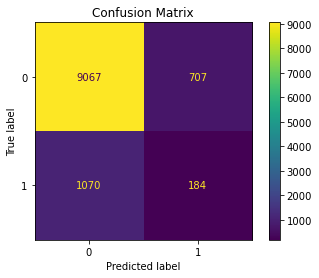

In [32]:
#Confusion Matrix:
plot_confusion_matrix(model_1, x_data_val,y_data_val)
plt.title("Confusion Matrix")

In [33]:
# Function for calculating tn,tp,fn,fp of validation set:

def calculation(a,p):
    tn=0
    tp=0
    fn=0
    fp=0
    for i in range(len(a)):
        # if class is same and equal to 1 it's true positive and true negative is equal to 2:
        if(a[i]==p[i]):
            if(a[i]==1):
                tp=tp+1
            else:
                tn=tn+1
        # if the class is not same:
        else:
            if(a[i]==1):
                fn=fn+1
            else:
                fp=fp+1
    return tp,tn,fn,fp

tp_val,tn_val,fn_val,fp_val=calculation(y_data_val.values.ravel(),prediction_val)

print("The results for validation set are: ")
print("The True positive value is: "+str(tp_val)+"\nThe True negative value is: "+str(tn_val)+
      "\nThe False negative value is: "+str(fn_val)+"\nThe False positive value is: "+str(fp_val))

The results for validation set are: 
The True positive value is: 184
The True negative value is: 9067
The False negative value is: 1070
The False positive value is: 707


In [34]:
#Calculating all the measures of classification performance for validation set:

def measures(tp,tn,fn,fp):
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    error = 1 - accuracy
    tpr = tp/(tp+fn)
    tnr = tn/(tp+tn)
    fpr = 1-tnr
    fnr = 1-tpr
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = (2*recall*precision)/(recall + precision)
    print("")
    print("The accuracy is: "+str(accuracy))
    print("The error rate is: "+str(error)+"\n")
    print("")
    print("TPR: "+str(tpr))
    print("FPR: "+str(fpr))
    print("TNR: "+str(tnr))
    print("FNR: "+str(fnr))
    print("\n")
    print("")
    print("Sensitivity: "+str(sensitivity))
    print("Specificity: "+str(specificity))
    print("\n")
    print("")
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F-measure: "+str(f))
    return precision,recall

measures(tp_val,tn_val,fn_val,fp_val)


The accuracy is: 0.8388647080159594
The error rate is: 0.16113529198404064


TPR: 0.1467304625199362
FPR: 0.019889741649551373
TNR: 0.9801102583504486
FNR: 0.8532695374800638



Sensitivity: 0.1467304625199362
Specificity: 0.9276652342950685



Precision: 0.20650953984287318
Recall: 0.1467304625199362
F-measure: 0.17156177156177158


(0.20650953984287318, 0.1467304625199362)

In [35]:
# Separating the class variable columns from other columns in test set.
x_data_ = df_test.iloc[:,:44]
y_data_ = df_test.iloc[:,44:45]

x_data_ = pd.DataFrame(x_data_)
y_data_ = pd.DataFrame(y_data_)

In [36]:
prediction_test = model_1.predict(x_data_)
b = metrics.accuracy_score(y_data_,prediction_test)*100
b = b.round(2)
print("Test set accuracy is: "+str(b)+"%")

Test set accuracy is: 84.09%


Text(0.5, 1.0, 'Confusion Matrix')

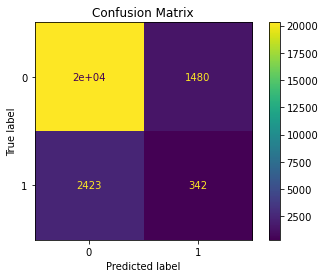

In [37]:
#Confusion Matrix:
plot_confusion_matrix(model_1, x_data_,y_data_)
plt.title("Confusion Matrix")

In [38]:
#calculating tn,tp,fn,fp of test set for model 1:

tp_test,tn_test,fn_test,fp_test=calculation(y_data_.values.ravel(),prediction_test)

print("The results for Test set are: ")
print("The True positive value is: "+str(tp_test)+"\nThe True negative value is: "+str(tn_test)+
      "\nThe False negative value is: "+str(fn_test)+"\nThe False positive value is: "+str(fp_test))

The results for Test set are: 
The True positive value is: 342
The True negative value is: 20290
The False negative value is: 2423
The False positive value is: 1480


In [39]:
#Calculating all the measures of classification performance for test set:
measures(tp_test,tn_test,fn_test,fp_test)


The accuracy is: 0.8409211330751987
The error rate is: 0.15907886692480133


TPR: 0.1236889692585895
FPR: 0.016576192322605654
TNR: 0.9834238076773943
FNR: 0.8763110307414105



Sensitivity: 0.1236889692585895
Specificity: 0.9320165365181442



Precision: 0.1877058177826564
Recall: 0.1236889692585895
F-measure: 0.14911706998037935


(0.1877058177826564, 0.1236889692585895)

In [40]:
y_score = model_1.predict_proba(x_data_)[:,1]


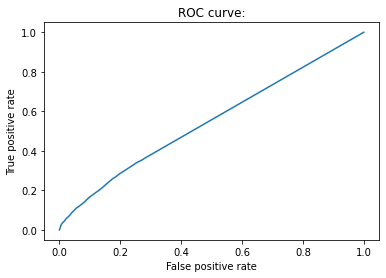

In [41]:
fpr,tpr,_=metrics.roc_curve(y_data_.values.ravel(),y_score)
plt.plot(fpr,tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC curve:")
plt.show()

#### Given how the ROC curve is looking, it can be considered as a good model as it is above the random classifier line.

### But as the dataset contains imbalanced class labels(one class has many labels as compared to others), we need to plot a PR-curve to check how good the model is.

Text(0.5, 0, 'Recall')

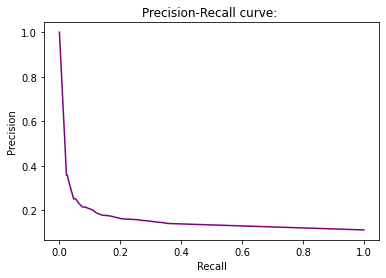

In [42]:
precision,recall,thresholds = precision_recall_curve(y_data_,y_score)
fig,ax = plt.subplots()
ax.plot(recall,precision,color='purple')
ax.set_title("Precision-Recall curve: ")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#### From the PR curve we can say that the model is not good as when the precision is 1 the recall is very low and vice-versa

## Model 2

### For this model I am using Logistic regression.

In [43]:
model_2 = LogisticRegression(max_iter = 900,multi_class='ovr')
model_2.fit(x_data_train,y_data_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=900, multi_class='ovr')

In [44]:
prediction_val = model_2.predict(x_data_val)
a = metrics.accuracy_score(y_data_val,prediction_val)*100
a = a.round(2)
print("Validation set accuracy is: "+str(a)+"%")

Validation set accuracy is: 88.66%


Text(0.5, 1.0, 'Confusion Matrix')

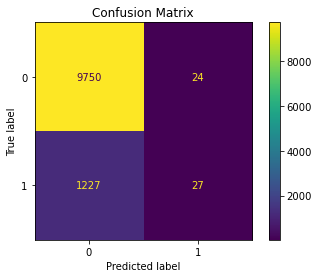

In [45]:
#Confusion Matrix:
plot_confusion_matrix(model_2, x_data_val,y_data_val)
plt.title("Confusion Matrix")

In [46]:
tp_val,tn_val,fn_val,fp_val=calculation(y_data_val.values.ravel(),prediction_val)

print("The results for validation set are: ")
print("The True positive value is: "+str(tp_val)+"\nThe True negative value is: "+str(tn_val)+
      "\nThe False negative value is: "+str(fn_val)+"\nThe False positive value is: "+str(fp_val))

The results for validation set are: 
The True positive value is: 27
The True negative value is: 9750
The False negative value is: 1227
The False positive value is: 24


In [47]:
measures(tp_val,tn_val,fn_val,fp_val)


The accuracy is: 0.8865614798694232
The error rate is: 0.11343852013057676


TPR: 0.0215311004784689
FPR: 0.0027615833077631047
TNR: 0.9972384166922369
FNR: 0.9784688995215312



Sensitivity: 0.0215311004784689
Specificity: 0.9975445058317987



Precision: 0.5294117647058824
Recall: 0.0215311004784689
F-measure: 0.04137931034482758


(0.5294117647058824, 0.0215311004784689)

In [48]:
prediction_test = model_2.predict(x_data_)
b = metrics.accuracy_score(y_data_,prediction_test)*100
b = b.round(2)
print("Test set accuracy is: "+str(b)+"%")

Test set accuracy is: 88.65%


Text(0.5, 1.0, 'Confusion Matrix')

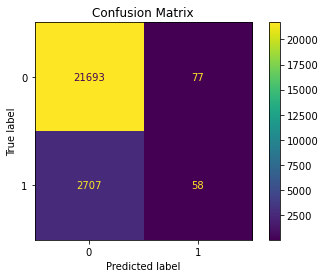

In [49]:
#Confusion Matrix:
plot_confusion_matrix(model_2, x_data_,y_data_)
plt.title("Confusion Matrix")

In [50]:
#calculating tn,tp,fn,fp of test set for model 2:

tp_test,tn_test,fn_test,fp_test=calculation(y_data_.values.ravel(),prediction_test)

print("The results for Test set are: ")
print("The True positive value is: "+str(tp_test)+"\nThe True negative value is: "+str(tn_test)+
      "\nThe False negative value is: "+str(fn_test)+"\nThe False positive value is: "+str(fp_test))

The results for Test set are: 
The True positive value is: 58
The True negative value is: 21693
The False negative value is: 2707
The False positive value is: 77


In [51]:
#Calculating all the measures of classification performance for test set:
measures(tp_test,tn_test,fn_test,fp_test)


The accuracy is: 0.8865294477277359
The error rate is: 0.1134705522722641


TPR: 0.020976491862567812
FPR: 0.002666544066939447
TNR: 0.9973334559330606
FNR: 0.9790235081374322



Sensitivity: 0.020976491862567812
Specificity: 0.9964630225080385



Precision: 0.42962962962962964
Recall: 0.020976491862567812
F-measure: 0.04


(0.42962962962962964, 0.020976491862567812)

In [52]:
y_score = model_2.predict_proba(x_data_)[:,1]

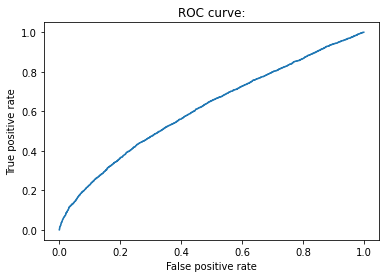

In [53]:
fpr,tpr,_=metrics.roc_curve(y_data_.values.ravel(),y_score)
plt.plot(fpr,tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC curve:")
plt.show()

This ROC curve looks a bit better than the model 1 but as mentioned above, the good way to measure how good the model is through PR curve as this is an imbalanced dataset.

Text(0.5, 0, 'Recall')

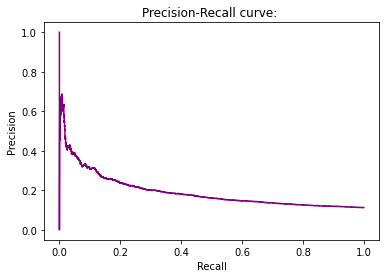

In [54]:
precision,recall,thresholds = precision_recall_curve(y_data_,y_score)
fig,ax = plt.subplots()
ax.plot(recall,precision,color='purple')
ax.set_title("Precision-Recall curve: ")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

The PR-curve looks better than one in model 1

## Model 3

### Using Naive bayes in model 3

In [55]:
gua = GaussianNB()
gua.fit(x_data_train,y_data_train.values.ravel())

GaussianNB()

In [56]:
prediction_val = gua.predict(x_data_val)
a = metrics.accuracy_score(y_data_val,prediction_val)*100
a = a.round(2)
print("Validation set accuracy is: "+str(a)+"%")

Validation set accuracy is: 85.55%


Text(0.5, 1.0, 'Confusion Matrix')

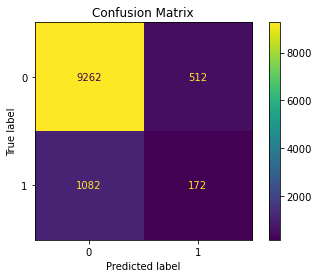

In [57]:
#Confusion Matrix:
plot_confusion_matrix(gua, x_data_val,y_data_val)
plt.title("Confusion Matrix")

In [58]:
tp_val,tn_val,fn_val,fp_val=calculation(y_data_val.values.ravel(),prediction_val)

print("The results for validation set are: ")
print("The True positive value is: "+str(tp_val)+"\nThe True negative value is: "+str(tn_val)+
      "\nThe False negative value is: "+str(fn_val)+"\nThe False positive value is: "+str(fp_val))

The results for validation set are: 
The True positive value is: 172
The True negative value is: 9262
The False negative value is: 1082
The False positive value is: 512


In [59]:
measures(tp_val,tn_val,fn_val,fp_val)


The accuracy is: 0.8554588320638375
The error rate is: 0.14454116793616245


TPR: 0.1371610845295056
FPR: 0.01823192707229171
TNR: 0.9817680729277083
FNR: 0.8628389154704944



Sensitivity: 0.1371610845295056
Specificity: 0.9476161244117045



Precision: 0.25146198830409355
Recall: 0.1371610845295056
F-measure: 0.17750257997936017


(0.25146198830409355, 0.1371610845295056)

In [60]:
prediction_test = gua.predict(x_data_)
b = metrics.accuracy_score(y_data_,prediction_test)*100
b = b.round(2)
print("Test set accuracy is: "+str(b)+"%")

Test set accuracy is: 87.35%


Text(0.5, 1.0, 'Confusion Matrix')

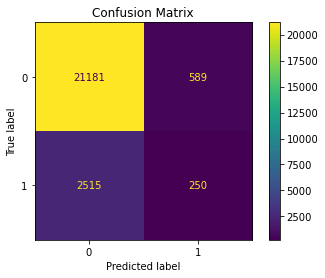

In [61]:
#Confusion Matrix:
plot_confusion_matrix(gua, x_data_,y_data_)
plt.title("Confusion Matrix")

In [62]:
#calculating tn,tp,fn,fp of test set for model 3:

tp_test,tn_test,fn_test,fp_test=calculation(y_data_.values.ravel(),prediction_test)

print("The results for Test set are: ")
print("The True positive value is: "+str(tp_test)+"\nThe True negative value is: "+str(tn_test)+
      "\nThe False negative value is: "+str(fn_test)+"\nThe False positive value is: "+str(fp_test))

The results for Test set are: 
The True positive value is: 250
The True negative value is: 21181
The False negative value is: 2515
The False positive value is: 589


In [63]:
#Calculating all the measures of classification performance for test set:
measures(tp_test,tn_test,fn_test,fp_test)


The accuracy is: 0.8734868555125331
The error rate is: 0.12651314448746687


TPR: 0.09041591320072333
FPR: 0.01166534459427937
TNR: 0.9883346554057206
FNR: 0.9095840867992767



Sensitivity: 0.09041591320072333
Specificity: 0.9729444189251263



Precision: 0.29797377830750893
Recall: 0.09041591320072333
F-measure: 0.13873473917869034


(0.29797377830750893, 0.09041591320072333)

In [64]:
y_score = gua.predict_proba(x_data_)[:,1]

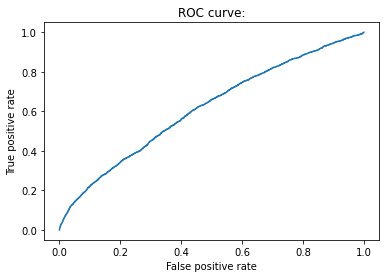

In [65]:
fpr,tpr,_=metrics.roc_curve(y_data_.values.ravel(),y_score)
plt.plot(fpr,tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC curve:")
plt.show()

The ROC curve seems similar to model 2

Text(0.5, 0, 'Recall')

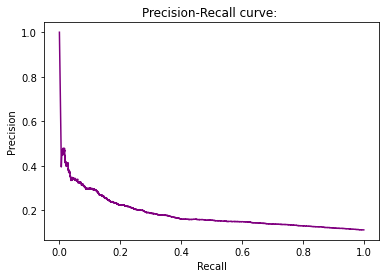

In [66]:
precision,recall,thresholds = precision_recall_curve(y_data_,y_score)
fig,ax = plt.subplots()
ax.plot(recall,precision,color='purple')
ax.set_title("Precision-Recall curve: ")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

This PR-curve looks the best among all 3 models so far.

## Comparison:

#### Model 1:

The accuracy is: 84.04 %

The error rate is: 15.96 %

Precision: 18.54 %

Recall: 12.26 %

F-measure: 0.1476 


#### Model 2

The accuracy is: 88.65 %

The error rate is: 11.35 %

Precision: 42.97 %

Recall: 2.1 %

F-measure: 0.04

#### Model 3

The accuracy is: 87.4 %

The error rate is: 12.65 %

Precision: 29.797 %

Recall: 9.04 %

F-measure: 0.14  

Model 2 has a better precision than the other 2 models but the recall is low as compared to other models. Hence model 2 can be considered the worst among all 3. Model 3 has a far better precision than model 1 and the recall is a little lower than model 1. Hence Model 3 seems to be the best among all 3.